<a href="https://colab.research.google.com/github/Carhuacusma/SI404_IA/blob/main/TB2/IA_TB2_Preprocesamiento_Alternativo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Modelo de inferencia para predecir el nivel socioeconómico de una persona en Perú basado en la Encuesta Permanente de Empleo de INEI


## Inteligencia Artificial - TB2

### Integrantes:
* Rafael Andrade Rodríguez	-	u201812443
* Dante Moreno Carhuacusma	-	u201818067
---
Universidad Peruana de Ciencias Aplicadas (UPC)

Ciclo 2021 - 1

## Análisis de Data

DataSets Originales: 

- Trimestre Diciembre 2020 - Febrero 2021: https://www.datosabiertos.gob.pe/dataset/encuesta-permanente-de-empleo-epe-2021-trimestre-m%C3%B3vil-dic-ene-feb-instituto-nacional-de
- Trimestre Septiembre 2020 - Noviembre 2020: https://www.datosabiertos.gob.pe/dataset/encuesta-permanente-de-empleo-epe-2020-trimestre-m%C3%B3vil-set-oct-nov-instituto-nacional-de
- https://www.datosabiertos.gob.pe/dataset/encuesta-permanente-de-empleo-epe-2020-trimestre-m%C3%B3vil-jun-jul-ago-instituto-nacional-de


Según el Diccionario de Datos provisto junto al dataset original:

Variable | Etiqueta | Tipo de Dato
--- | --- | ---
pano | Año de la encuesta | Numérico
pmes | Mes de la encuesta | Numérico
conglome | Número del conglomerado | Numérico
submuestra | Nº de Sub Muestra | Numérico
vivienda | Número de selección de la vivienda | Numérico
hogar | Hogar | Numérico 
codperso | Código de persona | Numérico
PXYZ | Pregunta N° XYZ | Categórica
ocu200 | Ocupación laboral de la persona | Categórica
iXYZ | Ingreso mensual monetario según indicador XYZ | Numérico

Cargar la Data

Importamos las librerías necesarias para realizar las operaciones algorítmicas y mostrar las representaciones gráficas a lo largo del código.
Luego, extraemos la muestra original de los datos contenidos en un repositorio vinculado a una cuenta de GitHub y selecionamos una muestra del Dataframe 

In [1]:
# 1. Librerías:
import pandas as pd
import numpy as np
from numpy import genfromtxt
from matplotlib import pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# 2. Cargar Data desde GitHub
# ... Data_Original = pd.read_csv("Trim Dic-Ene-Feb21.csv", sep = "|")
# ... Enlace Original: https://raw.githubusercontent.com/Carhuacusma/SI404_IA/main/TB2/731-Modulo76/Trim%20Dic-Ene-Feb21_Muestra.csv
Data_Muestra_Feb21 = pd.read_csv("https://raw.githubusercontent.com/Carhuacusma/SI404_IA/main/TB2/731-Modulo76/Trim%20Dic-Ene-Feb21.csv", sep = "|")
Data_Muestra_Ago20 = pd.read_csv("Trim Jun-Jul-Ago20_Muestra.csv",sep = "|")
print("Muestra: ", len(Data_Muestra_Feb21))
print(Data_Muestra_Feb21.head())
print("Muestra: ", len(Data_Muestra_Ago20))
print(Data_Muestra_Ago20.head())

Muestra:  400
   pano  pmes  conglome  submuestra  ...  ingtot  ingprin  resident    fa_def21
0  2020    12     17685           4  ...  1500.0   1500.0       1.0  380.928998
1  2020    12     24385           5  ...  1500.0   1500.0       1.0  923.697941
2  2020    12     29157           5  ...  1500.0   1500.0       1.0  919.309082
3  2020    12     47580           4  ...   930.0    930.0       1.0  897.678280
4  2020    12     90931           1  ...  1500.0   1500.0       1.0  696.259177

[5 rows x 103 columns]
Muestra:  200
   pano  pmes  conglome  submuestra  ...  ingtot  ingprin  resident    fa_jja20
0  2020     6     17299           4  ...   320.0    320.0       1.0  182.415386
1  2020     6     17299           4  ...     NaN      NaN       1.0  309.916795
2  2020     6     17299           4  ...     NaN      NaN       1.0  322.784688
3  2020     6     17299           4  ...     NaN      NaN       1.0         NaN
4  2020     6     17299           4  ...  3500.0   3500.0       1.0 

In [4]:
DataFrame_EPE = pd.concat([Data_Muestra_Feb21,Data_Muestra_Ago20])
print("Data Concatenada:", len(DataFrame_EPE))
DataFrame_EPE.head()

Data Concatenada: 600


,pano,pmes,conglome,submuestra,vivienda,hogar,codperso,dominio,estrato,codpanel,p103,p104,p105,p106,p107,p108,p109a,p109b,p109c,p200n,p200i,p200a,p200b,p200bb,p200c,p200d,p200dd,p200e,p200f,p200g,p201,p202,p203,p204,p2041,p2042,p2043,p2044,p2045,p2046,...,p209h,p209ee,p210,p211a,p211b,p212a,p212b,p212c,p212d,p212e,p213,p214,p215,p216,p217,p218,p219,p220,p222,P223A1,P223A2,P223A3,P223A4,P223A5,P223A6,P223A7,P224,P225,ocu200,i211a,i211b,i212a,i212b,i212c,i212d,ingtot,ingprin,resident,fa_def21,fa_jja20
0,2020,12,17685,4,66,11,2,8.0,1,19121103,3,1,2.0,NaN,1,23,8.0,3.0,NaN,2.0,1.0,13.0,12.0,2020.0,19.0,12.0,2020.0,9.0,5.0,1997.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,4.0,1500.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,4.0,1.0,1500.0,0.0,NaN,NaN,NaN,NaN,1500.0,1500.0,1.0,380.928998,NaN
1,2020,12,24385,5,120,11,1,8.0,1,20121101,1,1,2.0,NaN,1,43,5.0,1.0,NaN,1.0,1.0,13.0,12.0,2020.0,19.0,12.0,2020.0,24.0,2.0,1977.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,4.0,1500.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,4.0,1.0,1500.0,0.0,NaN,NaN,NaN,NaN,1500.0,1500.0,1.0,923.697941,NaN
2,2020,12,29157,5,97,11,1,8.0,1,20121101,1,1,2.0,NaN,1,30,6.0,5.0,NaN,1.0,1.0,22.0,11.0,2020.0,28.0,11.0,2020.0,25.0,9.0,1990.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,4.0,1500.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,4.0,1.0,1500.0,0.0,NaN,NaN,NaN,NaN,1500.0,1500.0,1.0,919.309082,NaN
3,2020,12,47580,4,128,11,1,8.0,1,20121101,1,1,2.0,NaN,1,29,5.0,3.0,NaN,1.0,1.0,29.0,11.0,2020.0,5.0,12.0,2020.0,99.0,99.0,1991.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.0,2.0,4.0,930.0,0.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,4.0,1.0,930.0,0.0,NaN,NaN,NaN,NaN,930.0,930.0,1.0,897.678280,NaN
4,2020,12,90931,1,5,11,1,8.0,1,20121101,1,1,2.0,NaN,1,55,6.0,5.0,NaN,1.0,1.0,6.0,12.0,2020.0,12.0,12.0,2020.0,22.0,8.0,1965.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,2.0,4.0,1500.0,0.0,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,6.0,4.0,1.0,1500.0,0.0,NaN,NaN,NaN,NaN,1500.0,1500.0,1.0,696.259177,NaN


Cada trimestre consta de 200 instancias. La muestra del trimestre móvil Diciembre 2020 - Febrero 2021 concatenada a la del trimestre Septiembre - Noviembre 2020, consta de 103 variables.

El trimestre móvil Junio - Agosto 2020 consta de 102 variables.

Concatenando la data de los tres trimestres, obtenemos 600 instancias de 104 columnas.

In [5]:
#@title Confirmar información sobre la recopilación de Data
print("Año: \t", pd.unique(DataFrame_EPE['pano']))
print("Mes: \t", pd.unique(DataFrame_EPE['pmes']))
print("Estrato: \t", pd.unique(DataFrame_EPE['estrato']))
print("Submuestra: \t", pd.unique(DataFrame_EPE['submuestra']))

Año: 	 [2020 2021]
Mes: 	 [12  1  2  9  6]
Estrato: 	 [1 5 4 3]
Submuestra: 	 [4 5 1 2 3]


A través de estos resultados, confirmamos que la data fue recopilada desde Diciembre del 2020 a Febrero del 2021. Se dividió en 5 submuestras, y todos pertenecían a un mismo estrato (urbano, según el diccionario).

Dado que esta información no es relevante para la red neuronal, podemos marcar estas variables para eliminarlas en el preprocesamiento.

#### Elegir Preguntas relevantes según el Diccionario de Datos

Debido a la gran cantidad de variables presentes, la mayoría de ellas preguntas con respuestas categóricas, seleccionamos algunas según el Diccionario.

ID | Pregunta | Respuestas
--- | --- | ---
P107 | Sexo | 1: Hombre 
P107 | "" |2: Mujer
P108 | Edad | En años
P109a | Nivel educativo aprobado | 1: Sin Nivel
P109a | "" | 2: Inicial
P109a | "" | 3: Primaria Incompleta
P109a | "" | 4: Primaria Completa
P109a | "" | 5: Secundaria Incompleta
P109a | "" | 6: Secundaria Completa
P109a | "" | 7: Superior No Univ. Incompleta
P109a | "" | 8: Superior No Univ. Completa
P109a | "" | 9: Superior Univ. Incompleta
P109a | "" | 10: Superior Univ. Completa
P209cc | Normalmente, ¿cuántas horas trabaja a la semana en todas sus ocupaciones? | Numérico
P212e | ¿Tiene actividad secundaria? | 1: No tiene actividad secundaria
P212e | "" | 2: Tiene actividad secundaria
P220 | ¿Ha trabajado antes? | 1: Sí
P220 | "" | 2: No
P222 | El sistema se seguros de salud al cual está afiliado es... | 1: EsSalud
P222 | "" | 2: Seguro Privado de Salud
P222 | "" | 3: Ambos (Privado y EsSalud)
P222 | "" | 4: Otro
P222 | "" | 5: No está afiliado
P222 | "" | 8: Seguro Universal de Salud SIS
P224 | Por sus antepasados y de acuerdo a sus costumbres. ¿Ud. se considera ... ? | 1: Quechua
P224 | "" | 2: Aymara
P224 | "" | 3: Nativo o indígena de la Amazonía
P224 | "" | 4: Negro/Mulato/Zambo/Afroperuano
P224 | "" | 5: Blanco
P224 | "" | 6: Mestizo
P224 | "" | 7: Otro
P224 | "" | 8: No Sabe
P225 | ¿Cuál es el idioma o lengua materna? | 1: Quechua
P225 | "" | 2: Aymara
P225 | "" | 3: Otra lengua nativa
P225 | "" | 4: Castellano
P225 | "" | 5: Portugués
P225 | "" | 6: Otra lengua extranjera
P225 | "" | 7: Es sordo / mudo (a)
P225 | "" | 8: Lengua de Señas Peruanas
INGTOT | Total Ingreso Mensual por persona | Numérico
INGPRIN | Total Ingreso (Principal por Trabajo) Mensual por persona | Numérico

## Preprocesamiento

Analizamos las variables elegidas: P107, P108, P109a, P209cc, P212e, P220, P222, P224, P225, INGTOT e INGPRIN.

In [92]:
variables_elegidas = ['p107', 'p108', 'p109a', 'p209cc', 'p212e', 'p220', 'p222', 'P224', 'P225', 'ingtot', 'ingprin']
for variable in variables_elegidas:
  nulos = DataFrame_EPE[variable].isnull().sum()
  print("En %s, hay %s instancias vacías"%(variable,nulos))

En p107, hay 0 instancias vacías
En p108, hay 0 instancias vacías
En p109a, hay 27 instancias vacías
En p209cc, hay 539 instancias vacías
En p212e, hay 291 instancias vacías
En p220, hay 444 instancias vacías
En p222, hay 114 instancias vacías
En P224, hay 114 instancias vacías
En P225, hay 114 instancias vacías
En ingtot, hay 270 instancias vacías
En ingprin, hay 270 instancias vacías


In [93]:
#@title Filtramos las variables a utilizar en un nuevo DataFrame
Data = DataFrame_EPE.filter(variables_elegidas, axis=1)
print(Data.head())

   p107  p108  p109a  p209cc  p212e  p220  p222  P224  P225  ingtot  ingprin
0     1    23    8.0     NaN    1.0   NaN   1.0   6.0   4.0  1500.0   1500.0
1     1    43    5.0     NaN    1.0   NaN   1.0   6.0   4.0  1500.0   1500.0
2     1    30    6.0     NaN    1.0   NaN   1.0   6.0   4.0  1500.0   1500.0
3     1    29    5.0     NaN    1.0   NaN   5.0   6.0   4.0   930.0    930.0
4     1    55    6.0    57.0    0.0   NaN   1.0   6.0   4.0  1500.0   1500.0


#### Manejar la data incompleta y adaptar las columnas

In [94]:
#@title Renombrar las variables
Data = Data.rename(columns={'p107': 'Sexo', 
                            'p108': 'Edad',
                            'p109a': 'Nivel educativo',
                            'p209cc': 'Horas semanales',
                            'p212e': 'Actividad secundaria',
                            'p220': 'Trabajo anterior',
                            'p222': 'Seguro de salud',
                            'P224': 'Etnia',
                            'P225': 'Lengua materna'
                            })
print(Data.head())

   Sexo  Edad  Nivel educativo  ...  Lengua materna  ingtot  ingprin
0     1    23              8.0  ...             4.0  1500.0   1500.0
1     1    43              5.0  ...             4.0  1500.0   1500.0
2     1    30              6.0  ...             4.0  1500.0   1500.0
3     1    29              5.0  ...             4.0   930.0    930.0
4     1    55              6.0  ...             4.0  1500.0   1500.0

[5 rows x 11 columns]


Rango original de **"Nivel de Educación"**:

1. Sin Nivel
2. Inicial
3. Primaria Incompleta
4. Primaria Completa
5. Secundaria Incompleta
6. Secundaria Completa
7. Superior No Univ. Incompleta
8. Superior No Univ. Completa
9. Superior Univ. Incompleta
10. Superior Univ. Completa

- Entonces, asumimos que los valores $NaN$ representan la respuesta por defecto 'Sin Nivel' educativo.
- Además, cambiamos el nombre de la columna para facilitar la interpretación de la Data
- Cambiamos el rango [$1$, $10$]; a [$0$; $9$]; con $0$ como el menor nivel educativo posible

In [95]:
#@title Cambiar rango de 'Nivel educativo'
print("Rango original:")
print(pd.unique(Data['Nivel educativo']))
#... Dentro de las variables de 'Data', el índice de la pregunta p109a es 2
for i in range(len(Data)):
  if pd.isna(Data.iloc[i,2]):
    Data.iloc[i,2] = np.int32(0)
  else:
    Data.iloc[i,2] = np.int32(Data.iloc[i,2] - 1)

#... Corroborar:
print("El rango de 'Nivel educativo' ahora es: ")
print(pd.unique(Data["Nivel educativo"]))
#... Convertir el tipo de Dato a 'Entero'
Data = Data.astype({"Nivel educativo": int})
#... Mostrar
Data.head()

Rango original:
[ 8.  5.  6.  7. 10.  9.  3.  4. nan  1.  2.]
El rango de 'Nivel educativo' ahora es: 
[7. 4. 5. 6. 9. 8. 2. 3. 0. 1.]


,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,ingtot,ingprin
0,1,23,7,NaN,1.0,NaN,1.0,6.0,4.0,1500.0,1500.0
1,1,43,4,NaN,1.0,NaN,1.0,6.0,4.0,1500.0,1500.0
2,1,30,5,NaN,1.0,NaN,1.0,6.0,4.0,1500.0,1500.0
3,1,29,4,NaN,1.0,NaN,5.0,6.0,4.0,930.0,930.0
4,1,55,5,57.0,0.0,NaN,1.0,6.0,4.0,1500.0,1500.0


**P209cc**: Normalmente, ¿cuántas horas trabaja a la semana en todas sus ocupaciones?
> Rango: Numérico

- Asumimos que la data incompleta en esta columna significa que la persona no trabaja; es decir, $0$ horas a la semana.

In [96]:
#@title Cambiar NaN en 'Horas semanales'
#... Cambiar NaN a 0
print("Rango original:", pd.unique(Data['Horas semanales']))
#... el indice es la columna 3
indice = 3
for i in range(len(Data)):
  if pd.isna(Data.iloc[i,indice]):
    Data.iloc[i,indice] = np.int32(0)
#... Corroborar:
print("El rango de 'Horas semanales' ahora es: ")
print(pd.unique(Data['Horas semanales']))
#... Mostrar
Data.head()

Rango original: [nan 57. 58. 48. 40. 66. 45. 50. 56. 60. 24. 36. 28. 20. 35. 52. 18. 30.]
El rango de 'Horas semanales' ahora es: 
[ 0. 57. 58. 48. 40. 66. 45. 50. 56. 60. 24. 36. 28. 20. 35. 52. 18. 30.]


,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,ingtot,ingprin
0,1,23,7,0.0,1.0,NaN,1.0,6.0,4.0,1500.0,1500.0
1,1,43,4,0.0,1.0,NaN,1.0,6.0,4.0,1500.0,1500.0
2,1,30,5,0.0,1.0,NaN,1.0,6.0,4.0,1500.0,1500.0
3,1,29,4,0.0,1.0,NaN,5.0,6.0,4.0,930.0,930.0
4,1,55,5,57.0,0.0,NaN,1.0,6.0,4.0,1500.0,1500.0


Rango original de **'Actividad secundaria'** es:
> 1. No tiene actividad secundaria
> 2. Tiene actividad secundaria

- Cambiamos el rango para que la variables sea booleana; con $0 = False; 1 = True$; y asumiendo que, al no haber respuesta, no tiene trabajo secundario.

In [97]:
#@title Cambiar NaN en 'Actividad secundaria'
print("Rango original:", pd.unique(Data['Actividad secundaria']))
#... Cambiar NaN a 0
#... el indice es la columna 4
indice = 4
for i in range(len(Data)):
  if pd.isna(Data.iloc[i,indice]):
    Data.iloc[i,indice] = 0
#... Corroborar:
print("El rango de 'Actividad secundaria' ahora es: ")
print(pd.unique(Data['Actividad secundaria']))
#... Cambiar el tipo de Dato
#Data = Data.astype({"Actividad secundaria": bool})
#... Mostrar
Data.head()

Rango original: [ 1.  0. nan]
El rango de 'Actividad secundaria' ahora es: 
[1. 0.]


,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,ingtot,ingprin
0,1,23,7,0.0,1.0,NaN,1.0,6.0,4.0,1500.0,1500.0
1,1,43,4,0.0,1.0,NaN,1.0,6.0,4.0,1500.0,1500.0
2,1,30,5,0.0,1.0,NaN,1.0,6.0,4.0,1500.0,1500.0
3,1,29,4,0.0,1.0,NaN,5.0,6.0,4.0,930.0,930.0
4,1,55,5,57.0,0.0,NaN,1.0,6.0,4.0,1500.0,1500.0


In [98]:
#@title Cambiar NaN en 'Trabajo anterior'
print("Rango original:", pd.unique(Data['Trabajo anterior']))
#... Cambiar NaN a 0
#... el indice es la columna 5
indice = 5
for i in range(len(Data)):
  if pd.isna(Data.iloc[i,indice]):
    Data.iloc[i,indice] = 0
  else:
    Data.iloc[i,indice] = Data.iloc[i,indice] - 1
#... Corroborar:
print("El rango de 'Trabajo anterior' ahora es: ")
print(pd.unique(Data['Trabajo anterior']))
#... Cambiar el tipo de Dato
#Data = Data.astype({"Trabajo anterior": bool})
#... Mostrar
Data.head()

Rango original: [nan  1.  2.]
El rango de 'Trabajo anterior' ahora es: 
[0. 1.]


,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,ingtot,ingprin
0,1,23,7,0.0,1.0,0.0,1.0,6.0,4.0,1500.0,1500.0
1,1,43,4,0.0,1.0,0.0,1.0,6.0,4.0,1500.0,1500.0
2,1,30,5,0.0,1.0,0.0,1.0,6.0,4.0,1500.0,1500.0
3,1,29,4,0.0,1.0,0.0,5.0,6.0,4.0,930.0,930.0
4,1,55,5,57.0,0.0,0.0,1.0,6.0,4.0,1500.0,1500.0


La siguiente columna, sobre el Seguro de salud, tiene originalmente el formato:


El sistema se seguros de salud al cual está afiliado es...
> 1. EsSalud
> 2. Seguro Privado de Salud
> 3. Ambos (Privado y EsSalud)
> 4. Otro
> 5. No está afiliado
> 6. Seguro Universal de Salud SIS



In [99]:
pd.unique(Data['Seguro de salud'])

array([ 1.,  5.,  6.,  3.,  4.,  2., nan])

Podemos reorganizar los valores del diccionario, para que $0$ represente la menor afiliación (No tiene seguro) y $5$ represente mayor estabilidad ('Ambos')

> 0. No está afiliado
> 1. Seguro Universal de Salud (SIS)
> 2. EsSalud
> 3. Otro
> 4. Seguro Privado de Salud
> 5. Ambos

In [100]:
#@title Cambiar los valores en 'Seguro de salud'
print("Rango original:", pd.unique(Data['Seguro de salud']))
#... Cambiar NaN a 0
#... el indice es la columna 6
indice = 6
for i in range(len(Data)):
  if pd.isna(Data.iloc[i,indice]):
    Data.iloc[i,indice] = 0
  elif Data.iloc[i,indice] == 1:
    Data.iloc[i,indice] = 2
  elif Data.iloc[i,indice] == 2:
    Data.iloc[i,indice] = 4
  elif Data.iloc[i,indice] == 3:
    Data.iloc[i,indice] = 5
  elif Data.iloc[i,indice] == 4:
    Data.iloc[i,indice] = 3
  elif Data.iloc[i,indice] == 5:
    Data.iloc[i,indice] = 0
  elif Data.iloc[i,indice] == 6:
    Data.iloc[i,indice] = 1
#... Corroborar:
print("El rango de 'Seguro de salud' ahora es: ")
print(pd.unique(Data['Seguro de salud']))
#... Mostrar
Data.head()

Rango original: [ 1.  5.  6.  3.  4.  2. nan]
El rango de 'Seguro de salud' ahora es: 
[2. 0. 1. 5. 3. 4.]


,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,ingtot,ingprin
0,1,23,7,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
1,1,43,4,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
2,1,30,5,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
3,1,29,4,0.0,1.0,0.0,0.0,6.0,4.0,930.0,930.0
4,1,55,5,57.0,0.0,0.0,2.0,6.0,4.0,1500.0,1500.0


Consideramos que si no respone la pregunta sobre qué etnia se considera, entonces 'No Sabe' (Opción 8)

In [101]:
pd.unique(Data['Etnia'])

array([ 6.,  1.,  5.,  7.,  8.,  4.,  2., nan,  3.])

In [102]:
#@title Cambiar NaN en 'Etnia'
print("Rango original:", pd.unique(Data['Etnia']))
#... Cambiar NaN a 0
#... el indice es la columna 7
indice = 7
for i in range(len(Data)):
  if pd.isna(Data.iloc[i,indice]):
    Data.iloc[i,indice] = 8

#... Corroborar:
print("El rango de 'Etnia' ahora es: ")
print(pd.unique(Data['Etnia']))
#... Mostrar
Data.head()

Rango original: [ 6.  1.  5.  7.  8.  4.  2. nan  3.]
El rango de 'Etnia' ahora es: 
[6. 1. 5. 7. 8. 4. 2. 3.]


,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,ingtot,ingprin
0,1,23,7,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
1,1,43,4,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
2,1,30,5,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
3,1,29,4,0.0,1.0,0.0,0.0,6.0,4.0,930.0,930.0
4,1,55,5,57.0,0.0,0.0,2.0,6.0,4.0,1500.0,1500.0


In [103]:
pd.unique(Data['Lengua materna'])

array([ 4.,  6.,  3.,  1.,  2.,  5., nan])

Para no asumir que una lengua es la predeterminada, manejamos la data incompleta como $0$

In [104]:
#@title Cambiar los valores en 'Lengua materna'
print("Rango original:", pd.unique(Data['Lengua materna']))
#... Cambiar NaN a 0
#... el indice es la columna 8
indice = 8
for i in range(len(Data)):
  if pd.isna(Data.iloc[i,indice]):
    Data.iloc[i,indice] = 0

#... Corroborar:
print("El rango de 'Lengua materna' ahora es: ")
print(pd.unique(Data['Lengua materna']))
#... Mostrar
Data.head()

Rango original: [ 4.  6.  3.  1.  2.  5. nan]
El rango de 'Lengua materna' ahora es: 
[4. 6. 3. 1. 2. 5. 0.]


,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,ingtot,ingprin
0,1,23,7,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
1,1,43,4,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
2,1,30,5,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
3,1,29,4,0.0,1.0,0.0,0.0,6.0,4.0,930.0,930.0
4,1,55,5,57.0,0.0,0.0,2.0,6.0,4.0,1500.0,1500.0


In [105]:
#@title Cambiar NaN en 'ingtot' (Ingresos Totales)
print("Rango original:", pd.unique(Data['ingtot']))
#... Cambiar NaN a 0
#... el indice es la columna 9
indice = 9
for i in range(len(Data)):
  if pd.isna(Data.iloc[i,indice]):
    Data.iloc[i,indice] = 0

#... Corroborar:
print("El rango de 'ingtot' ahora es: ")
print(pd.unique(Data['ingtot']))
#... Mostrar
Data.head()

Rango original: [1500.  930.  500. 1000.  800. 2600. 2000. 5000. 1265.    0.  946. 3031.
 1299. 3634.  900. 2200. 1100. 1440. 2500.  650. 1300. 3300.  961. 1480.
 1516. 1455. 2598. 1039. 1600. 1213.  866. 3000. 2800. 1200.  400. 1103.
 1339. 3208. 3139. 1550.  950. 1700. 1212.  540.  550. 1083. 1169. 1170.
 1178.  329. 1291. 1525.  364.  485.  867.  987.  303. 1400.  700.  802.
 3039. 2539. 1800. 4200. 2400.  600.  671. 1732.  850.  390.  433. 1210.
   nan 1250. 4000. 4500.  519. 1507. 1386.  325. 1295. 1373. 1075.  975.
 1559.  779.   50. 1612.  520. 3604. 1150. 1622.   75.  260. 1681.  624.
 1385.  888.  300. 3673. 3173.  455.  953.   60.  100. 2260.  320. 3500.
 1390.  398. 1724. 1425. 1526. 1868.  875.  996.  420.  338. 1560. 1725.
 2078.  165. 2165. 1195.  350.  217.]
El rango de 'ingtot' ahora es: 
[1500.  930.  500. 1000.  800. 2600. 2000. 5000. 1265.    0.  946. 3031.
 1299. 3634.  900. 2200. 1100. 1440. 2500.  650. 1300. 3300.  961. 1480.
 1516. 1455. 2598. 1039. 1600. 1213.  

,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,ingtot,ingprin
0,1,23,7,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
1,1,43,4,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
2,1,30,5,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
3,1,29,4,0.0,1.0,0.0,0.0,6.0,4.0,930.0,930.0
4,1,55,5,57.0,0.0,0.0,2.0,6.0,4.0,1500.0,1500.0


In [106]:
#@title Cambiar NaN en 'ingprin' (Ingresos Principales)
print("Rango original:", pd.unique(Data['ingprin']))
#... Cambiar NaN a 0
#... el indice es la columna 9
indice = 10
for i in range(len(Data)):
  if pd.isna(Data.iloc[i,indice]):
    Data.iloc[i,indice] = 0

#... Corroborar:
print("El rango de 'ingprin' ahora es: ")
print(pd.unique(Data['ingprin']))
#... Mostrar
Data.head()

Rango original: [1500.  930.  500. 1000.    0. 2000. 5000. 1265.  600. 3031. 1299. 3634.
  900. 2200. 1100. 1280. 2500.  650. 1300. 3300.  961. 1480. 1516. 1282.
 2598. 1039. 1600. 1138.  866. 3000. 2800. 1200.  400. 1103. 1339. 3208.
 3139. 1550.  950. 1700.  540.  550. 1083. 1169. 1170. 1178.  329. 1291.
 1525.  364.  485.  867.  987.  303. 1400.  700.  802. 3039. 1800. 4200.
 2400.  671. 1732.  850.  390.  433. 1210.   nan  750. 4000. 4500.  519.
 1507. 1386.  325.  800. 1295. 1373. 1075.  975. 1559.  779.  260.   50.
 1612.  520. 3604. 2600. 1150. 1622.   75.  538.  624. 1385.  758.  300.
 3673. 3173.  455.  953.   60.  100. 2260.  320. 3500.  398. 1724. 1122.
 1526. 1868.  875.  996.  420.  338. 1212. 1560. 1725. 2078.  165. 2165.
 1195.  350.  217.]
El rango de 'ingprin' ahora es: 
[1500.  930.  500. 1000.    0. 2000. 5000. 1265.  600. 3031. 1299. 3634.
  900. 2200. 1100. 1280. 2500.  650. 1300. 3300.  961. 1480. 1516. 1282.
 2598. 1039. 1600. 1138.  866. 3000. 2800. 1200.  400. 

,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,ingtot,ingprin
0,1,23,7,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
1,1,43,4,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
2,1,30,5,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
3,1,29,4,0.0,1.0,0.0,0.0,6.0,4.0,930.0,930.0
4,1,55,5,57.0,0.0,0.0,2.0,6.0,4.0,1500.0,1500.0


### Agregar Nivel Socioeconómico:

In [107]:
#@title Situación actual de Data
Data

,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,ingtot,ingprin
0,1,23,7,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
1,1,43,4,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
2,1,30,5,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0
3,1,29,4,0.0,1.0,0.0,0.0,6.0,4.0,930.0,930.0
4,1,55,5,57.0,0.0,0.0,2.0,6.0,4.0,1500.0,1500.0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,51,7,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0
196,2,43,3,0.0,0.0,0.0,1.0,6.0,4.0,0.0,0.0
197,2,19,5,0.0,0.0,0.0,1.0,6.0,4.0,0.0,0.0
198,1,15,3,0.0,0.0,1.0,1.0,6.0,4.0,0.0,0.0


***3er Paso:*** Añadimos una nueva columna al dataset, que indica la Calidad del empleo, objetivo principal de nuestro trabajo. El valor acertado para esta característica se calcula a partir de los ingresos totales de cada persona. Por ende, esta variable no será incluida en el entrenamiento, pero servirá para verificar la proximidad del algoritmo a los resultados reales.

La distribución socioeconómica, según  Game Changers IPSOS, se podría dividir en 5 tipos:

*   A: Ingreso promedio de S/.12,660 y Gasto mensual del 62%
*   B: Ingreso promedio de S/.7,020 y Gasto mensual del 68%
*   C: Ingreso promedio de S/.3,970 y Gasto mensual del 75%
*   D: Ingreso promedio de S/.2,480 y Gasto mensual del 80%
*   E: Ingreso promedio de S/.1,300 y Gasto mensual del 87%

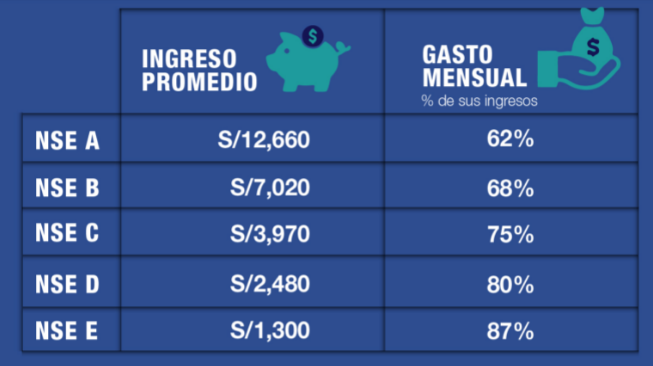

Para obtener más información acerca de la distribución socioeconómica y su seccionamiento, acceder al siguiente enlace: https://www.ipsos.com/es-pe/caracteristicas-de-los-niveles-socioeconomicos-en-el-peru

In [108]:
#@title Clasificar según Ingresos
n_socio = []
for i in Data['ingtot']:
  if i >= 12660:
    n_socio.append(4)
  else:
    if i >= 7020:
      n_socio.append(3)
    else:
      if i >= 3970:
        n_socio.append(2)
      else:
        if i >= 2480:
          n_socio.append(1)
        else:
          n_socio.append(0)

Data.insert(Data.shape[1],"Nivel social",n_socio, True)
Data

,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,ingtot,ingprin,Nivel social
0,1,23,7,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0,0
1,1,43,4,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0,0
2,1,30,5,0.0,1.0,0.0,2.0,6.0,4.0,1500.0,1500.0,0
3,1,29,4,0.0,1.0,0.0,0.0,6.0,4.0,930.0,930.0,0
4,1,55,5,57.0,0.0,0.0,2.0,6.0,4.0,1500.0,1500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
195,1,51,7,0.0,0.0,0.0,1.0,1.0,4.0,0.0,0.0,0
196,2,43,3,0.0,0.0,0.0,1.0,6.0,4.0,0.0,0.0,0
197,2,19,5,0.0,0.0,0.0,1.0,6.0,4.0,0.0,0.0,0
198,1,15,3,0.0,0.0,1.0,1.0,6.0,4.0,0.0,0.0,0


In [109]:
pd.unique(Data['Nivel social'])

array([0, 1, 2])

***4to Paso:*** Creamos archivo en formato txt a partir del Dataframe actual para poder comenzar el entrenamiento de la Red Neuronal

In [110]:
np.savetxt(r'Dataframe.txt', Data.values, fmt='%f')

## Redes neuronales SOM

Es un algoritmo útil para llevar a cabo la autoorganización y visualización de grandes conjuntos de datos multidimensionales de manera eficiente.

Establece que si x, y ∈ X son cercanos entonces ϕ(x) y ϕ(y)
serán neuronas cercanas.

#### Función de vecindad

Esta función se encarga de producir la topología o estructura del mapa neuronal. Los mapas autoorganizados usan una función de vecindad para preservar las propiedades topológicas del espacio de entrada.

La función de vecindad depende principalmente de la distancia de cuadrículas entre la BMU y la neurona que enviamos como parámetro. De forma simple, se asigna el valor 1 a todas las neuronas suficientemente cerca a BMU y 0 a las otras. La función de vecindad se contrae con el tiempo.

In [ ]:
def minimoNodo(data, t, pesos, n_rows, n_cols): 
  BMU = (0,0)
  distanciaMinima = 1.0e20 # Se inicializa en un pseudo infinito para que agarre el primer valor 
  for i in range(n_rows): # Recorremos la matriz de neuronas
    for j in range(n_cols):
      de = euc_dist(pesos[i][j], data[t]) # Distancia euclidiana t -> qué patrón de entrenamiento se usará 
      if de < distanciaMinima:
        distanciaMinima = de
        BMU = (i,j)
  return BMU

#### Distancia euclidiana

La distancia euclidiana representa la longitud de un segmento de línea entre dos puntos. Se puede calcular a partir del Coordenadas cartesianas de los puntos usando el Teorema de pitágoras.

Esta función nos ayudará a determinar si los nodos son cercanos a la BMU.

In [ ]:
def euc_dist(v1, v2):
  return np.linalg.norm(v1-v2)

#### Distancia Manhattan 

Es una forma de geometría en la que la métrica usual de la geometría euclidiana es reemplazada por una nueva métrica en la que la distancia entre dos puntos es la suma de las diferencias de sus coordenadas.

In [ ]:
def manhattan_dist(r1, c1, r2, c2):
  return np.abs(r1-r2) + np.abs(c1-c2)

#### Lectura

Elegimos las posiciones que vamos a utilizar como entrenamiento de la red neuronal.

In [ ]:
arrlectura = [i for i in range(Data_Muestra.shape[1]-2)]
arrlectura = [0,1,2,3,4,5,6,7,8,9,10]
arrlectura

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

#### Entrenamiento SOM (Mapas autoorganizativos)

Se emplea un conjunto finito de datos X = {x0, ..., xm−1} ⊂ Rn. 

Para cada tiempo t, se puede determinar un dato de entrada x(t) para la red neuronal, reciclando el conjunto X.

**Etapas del entrenamiento:**

*   Ordenamiento Global: 

  Se establecen los pesos de cada una de las neuronas, para que estas sean capaces de identificar el subconjunto característico dentro del conjunto de datos X y para que las relaciones de cercanía entre las distintas neuronas del mapa, reflejen la similitud entre los datos. 

*   Refinamiento: 

  Los valores de α(t) deben ser pequeños y decrecer lineal o exponencialmente. 
La precisión final del mapa dependerá del número de pasos en esta etapa final de la convergencia, la cual debe ser razonablemente larga.

In [ ]:
  archivo = "Dataframe.txt"
  ncolumnas = len(arrlectura) #MODIFICAR HASTA CORREGIR VALORES FALTANTES
  dataEntrenamiento = np.loadtxt(archivo, delimiter = " ", usecols = arrlectura, dtype = np.float64) # usecols incluye las columnas con las que voy a trabajar
  salida = np.loadtxt(archivo, delimiter=" ", usecols=[11], dtype = np.float64) #CAMBIAR LA COLUMNA A SECCIONAR DEPENDIENDO DE LO QUE SE QUIERA

In [ ]:
def SOM(dataEntrenamiento,atributos):
  Row = 40 #Entrenamiento
  Cols = 40 #Entrenamiento
  rangoMax = Row + Cols
  factorAprendizaje = 0.3
  iteraciones = 1000
  "inicializamos pesos"
  pesos = np.random.randn(Row, Cols, atributos)
  for s in range (iteraciones):
    alfa = 1.0 - ((s*1.0)/iteraciones)
    rangoActual = (int)(alfa*rangoMax)
    alfaActual = alfa * factorAprendizaje
    t = np.random.randint(len(dataEntrenamiento))
    (bmu_row, bmu_col) = minimoNodo(dataEntrenamiento, t, pesos, Row, Cols)
    for i in range(Row):
      for j in range(Cols):
        if manhattan_dist(bmu_row, bmu_col,i,j) < rangoActual:
          pesos[i][j] = pesos[i][j] + alfaActual * (dataEntrenamiento[t] - pesos[i][j])
    
  (bmu_row, bmu_col) = minimoNodo(dataEntrenamiento,dataEntrenamiento.shape[0]-1,pesos,Row,Cols)
  print("Resultados de la Data de Entrada")
  print("Fila: ", bmu_row)
  print("Columna: ", bmu_col)
  print("Pesos: ", pesos[bmu_row,bmu_col])

  #VISUALIZACIÓN
  mapa = np.empty(shape=(Row,Cols), dtype = np.float64)
  for i in range(Row):
    for j in range(Cols):
      mapa[i][j] = -1
  for t in range(len(dataEntrenamiento)):
    (m_row,m_col) = minimoNodo(dataEntrenamiento,t,pesos, Row, Cols)
    mapa[m_row][m_col] = salida[t]
  plt.imshow(mapa)
  plt.colorbar()
  plt.show()

## Interfaz de Usuario - SOM

Nota: Ejecutar el código correspondiente a la sección 'Código e Informe' para cargar la Data y el modelo SOM.

In [ ]:
#@title Ingrese su información para predecir su calidad de empleo

Sexo = 'Hombre' #@param ["Hombre", "Mujer"] {allow-input: false}
Edad = 18 #@param {type:"number"}
Nivel_educativo_aprobado = 'Sin Educacion' #@param ["Sin Educacion", "Inicial", "Primaria Incompleta", "Primaria Completa", "Secundaria Incompleta","Secundaria Completa", "Superior No Univ. Incompleta", "Superior No Univ. Completa", "Superior Univ. Incompleta", "Superior Univ. Completa" ] {allow-input: false}
Horas_de_trabajo = 0 #@param {type:"number"}
Actividad_secundaria = 'Si' #@param ["No", "Si"] {allow-input: false}
Trabajo_Antes = 'Si trabaje' #@param ["Si trabaje", "No trabaje"] {allow-input: false}
Seguro_Salud =  'EsSalud' #@param ["EsSalud", "Seguro privado","Ambos","Otro","No afiliado", "SIS"] {allow-input: false}
Raza = 'Otro' #@param ["Quechua", "Aymara", "Nativo", "Negro", "Blanco", "Mestizo", "Otro"] {allow-input: false}
Lengua_Materna = 'Castellano' #@param ["Quechua", "Aymara", "Otra lengua nativa", "Castellano", "Portugues", "Otra lengua extranjera", "Es sordo/mudo", "Lenguaje de senas"] {allow-input: false}
Ing_Mensual = 5000 #@param {type:"number"}
Ing_Principal = 4000 #@param {type:"number"}

diccionario = {'Hombre': 1, 'Mujer': 2, 
               'Sin Educacion': 1, 'Inicial': 2, "Primaria Incompleta": 3, "Primaria Completa": 4,
               "Secundaria Incompleta": 5, "Secundaria Completa": 6, "Superior No Univ. Incompleta": 7,
               "Superior No Univ. Completa": 8, "Superior Univ. Incompleta": 9, "Superior Univ. Completa": 10,
               "No": 1, "Si": 2,
               "Quechua": 1, 'Aymara': 2, "Nativo": 3, "Negro": 4, "Blanco": 5, "Mestizo": 6, "Otro": 7,
               "Otra lengua nativa": 3, "Castellano": 4, "Portugues": 5, "Otra lengua extranjera": 6, "Es sordo/mudo": 7, "Lenguaje de senas": 8,
               "Si trabaje": 1, "No trabaje": 2, "EsSalud": 1, "Seguro privado": 2, "Ambos": 3,
               "Otro": 4, "No afiliado": 5, "SIS": 6}



In [ ]:
# Insertar data de entrada
Data_Muestra = Data_Muestra.append({"p107": diccionario[Sexo], "p108": int(Edad), "p109a": diccionario[Nivel_educativo_aprobado], "p209cc": int(Horas_de_trabajo),
                     "p212e": diccionario[Actividad_secundaria], "p220": diccionario[Trabajo_Antes], "p222": diccionario[Seguro_Salud],
                     "P224": diccionario[Raza], "P225": diccionario[Lengua_Materna], "ingtot": int(Ing_Mensual), 
                     "ingprin": int(Ing_Principal), "n_socio": 5}, ignore_index=True)

In [ ]:
Data_Muestra

,p107,p108,p109a,p209cc,p212e,p220,p222,P224,P225,ingtot,ingprin,n_socio
0,1,23,8.0,0.0,1.0,0.0,1.0,6.0,4.0,1500.0,1500.0,0
1,1,43,5.0,0.0,1.0,0.0,1.0,6.0,4.0,1500.0,1500.0,0
2,1,30,6.0,0.0,1.0,0.0,1.0,6.0,4.0,1500.0,1500.0,0
3,1,29,5.0,0.0,1.0,0.0,5.0,6.0,4.0,930.0,930.0,0
4,1,55,6.0,57.0,0.0,0.0,1.0,6.0,4.0,1500.0,1500.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
396,2,29,9.0,0.0,0.0,1.0,1.0,6.0,4.0,0.0,0.0,0
397,1,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
398,1,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
399,1,58,6.0,60.0,1.0,0.0,1.0,1.0,1.0,2000.0,2000.0,0


Resultados de la Data de Entrada
Fila:  14
Columna:  2
Pesos:  [1.16650291e+00 4.48219644e+01 6.92425101e+00 1.36972949e+01
 9.25647692e-01 1.39100894e-06 2.74819305e+00 5.54775702e+00
 3.70083756e+00 1.99760560e+03 1.99759769e+03]


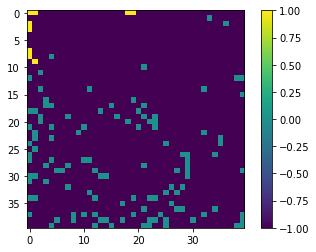

In [ ]:
if __name__ == "__main__":
  SOM(dataEntrenamiento, ncolumnas)

## Multicapa con SKLearn

In [80]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

### 1. Dividimos la Data en Entrenamiento y Test

In [117]:
pivote = len(Data) * 0.70 # El 80% de la Data sirve para entrenar, y el 20% para validar
print(pivote)

420.0


In [118]:
Data_Sin_Ingresos = Data.drop(columns = ['ingprin', 'ingtot'])
Data_Sin_Ingresos.head()

,Sexo,Edad,Nivel educativo,Horas semanales,Actividad secundaria,Trabajo anterior,Seguro de salud,Etnia,Lengua materna,Nivel social
0,1,23,7,0.0,1.0,0.0,2.0,6.0,4.0,0
1,1,43,4,0.0,1.0,0.0,2.0,6.0,4.0,0
2,1,30,5,0.0,1.0,0.0,2.0,6.0,4.0,0
3,1,29,4,0.0,1.0,0.0,0.0,6.0,4.0,0
4,1,55,5,57.0,0.0,0.0,2.0,6.0,4.0,0


In [120]:
x_train = Data_Sin_Ingresos.iloc[:420, :-1].to_numpy()
y_train = pd.get_dummies(Data_Sin_Ingresos.iloc[:420, -1]).to_numpy()

x_test = Data_Sin_Ingresos.iloc[420:, :-1].to_numpy()
y_test = pd.get_dummies(Data_Sin_Ingresos.iloc[420:, -1]).to_numpy()

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(420, 9) (420, 3)
(180, 9) (180, 3)


### 2. Desarrollamos modelo de ANN

In [121]:
modelo = Sequential([Dense(8, input_dim=9, activation='relu'),
                    Dense(18,activation='relu'),
                    Dense(25,activation='relu'),
                    Dense(30,activation='relu'),
                    Dense(10,activation='relu'),
                    Dense(3, activation='softmax')])
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [122]:
hist = modelo.fit(x_train, y_train, epochs=100, batch_size=10, verbose=2)

Epoch 1/100
42/42 - 1s - loss: 0.3506 - accuracy: 0.8952
Epoch 2/100
42/42 - 0s - loss: 0.2497 - accuracy: 0.9333
Epoch 3/100
42/42 - 0s - loss: 0.2266 - accuracy: 0.9333
Epoch 4/100
42/42 - 0s - loss: 0.2124 - accuracy: 0.9333
Epoch 5/100
42/42 - 0s - loss: 0.1957 - accuracy: 0.9333
Epoch 6/100
42/42 - 0s - loss: 0.1852 - accuracy: 0.9333
Epoch 7/100
42/42 - 0s - loss: 0.1834 - accuracy: 0.9333
Epoch 8/100
42/42 - 0s - loss: 0.1853 - accuracy: 0.9333
Epoch 9/100
42/42 - 0s - loss: 0.1797 - accuracy: 0.9333
Epoch 10/100
42/42 - 0s - loss: 0.1706 - accuracy: 0.9333
Epoch 11/100
42/42 - 0s - loss: 0.1690 - accuracy: 0.9333
Epoch 12/100
42/42 - 0s - loss: 0.1710 - accuracy: 0.9333
Epoch 13/100
42/42 - 0s - loss: 0.1702 - accuracy: 0.9333
Epoch 14/100
42/42 - 0s - loss: 0.1709 - accuracy: 0.9333
Epoch 15/100
42/42 - 0s - loss: 0.1696 - accuracy: 0.9333
Epoch 16/100
42/42 - 0s - loss: 0.1614 - accuracy: 0.9333
Epoch 17/100
42/42 - 0s - loss: 0.1637 - accuracy: 0.9333
Epoch 18/100
42/42 - 0s

### 3. Evaluamos modelo

In [123]:
modelo.evaluate(x_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0790 - accuracy: 0.9889


[0.0789705440402031, 0.9888888597488403]

## Interfaz para predecir con Sklearn

In [124]:
#@ title Ingrese sus datos

Sexo = 'Hombre' #@param ["Hombre", "Mujer"] {allow-input: false}
Edad = 18 #@param {type:"number"}
Nivel_educativo_aprobado = 'Sin Educacion' #@param ["Sin Educacion", "Inicial", "Primaria Incompleta", "Primaria Completa", "Secundaria Incompleta","Secundaria Completa", "Superior No Univ. Incompleta", "Superior No Univ. Completa", "Superior Univ. Incompleta", "Superior Univ. Completa" ] {allow-input: false}
Horas_de_trabajo = 0 #@param {type:"number"}
Actividad_secundaria = 'Si' #@param ["No", "Si"] {allow-input: false}
Trabajo_Antes = 'Si' #@param ["No", "Si"] {allow-input: false}
Seguro_Salud =  'EsSalud' #@param ["EsSalud", "Seguro privado","Ambos","Otro","No afiliado", "SIS"] {allow-input: false}
Etnia = 'Otro' #@param ["Quechua", "Aymara", "Nativo", "Negro", "Blanco", "Mestizo", "Otro"] {allow-input: false}
Lengua_Materna = 'Castellano' #@param ["Quechua", "Aymara", "Otra lengua nativa", "Castellano", "Portugues", "Otra lengua extranjera", "Es sordo/mudo", "Lenguaje de senas"] {allow-input: false}

diccionario = {'Hombre': 1, 'Mujer': 2, 
               'Sin Educacion': 0, 'Inicial': 1, 
               "Primaria Incompleta": 2, 
               "Primaria Completa": 3,
               "Secundaria Incompleta": 4, 
               "Secundaria Completa": 5, 
               "Superior No Univ. Incompleta": 6,
               "Superior No Univ. Completa": 7, 
               "Superior Univ. Incompleta": 8, 
               "Superior Univ. Completa": 9,
               "No": 0, "Si": 1,
               "Quechua": 1, 'Aymara': 2, "Nativo": 3, "Negro": 4, "Blanco": 5, "Mestizo": 6, "Otro": 7,
               "Otra lengua nativa": 3, "Castellano": 4, "Portugues": 5, "Otra lengua extranjera": 6, "Es sordo/mudo": 7, "Lenguaje de senas": 8, 
               "EsSalud": 3, 
               "Seguro privado": 4, 
               "Ambos": 5,
               "Otro": 2, 
               "No afiliado": 0, 
               "SIS": 1}

In [ ]:
nuevaInstancia = [diccionario[Sexo], int(Edad), diccionario[Nivel_educativo_aprobado], int(Horas_de_trabajo),
                  diccionario[Actividad_secundaria], diccionario[Trabajo_Antes], diccionario[Seguro_Salud],
                  diccionario[Etnia], diccionario[Lengua_Materna]]
modelo.predict_classes(nuevaInstancia)

### Graficando la evolución del error

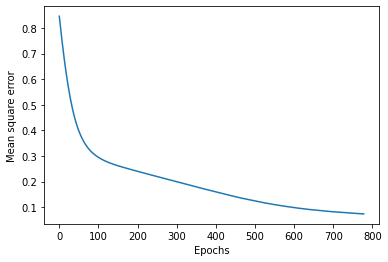

In [ ]:
plt.ylabel('Mean square error')
plt.xlabel('Epochs')
plt.plot(Multicapa.loss_curve_)